In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import os

import helperFunc as hf

## Functions

In [2]:
#taus can be a list of numbers or a list of tuples, it should work for both
def getModuAll(adjDict,taus,pRandRewires,rewirings = 4000):
    
    repetitions = len(adjDict)
    lenTaus = len(taus)
    lenPRand = len(pRandRewires)
    Q = np.zeros((lenPRand,lenTaus,repetitions))  
    
    for rep in np.arange(repetitions):
        for indT,tau in enumerate(taus):
            for indP,p in enumerate(pRandRewires):
        
                #load the specific rewired matrix
                A = adjDict[rep+1][(p, tau, rewirings)][1]
        
                #construct it so that igraph can read it
                #make it undirected
                g = ig.Graph(directed=False)
                #make it weighted
                g.es["weight"] = 1.0                
                
                g.add_vertices(len(A))
                ix, jx = A.nonzero()
                for i,j in zip(ix, jx):
                    if i<j:
                        g.add_edge(i, j, weight=A[i,j])
            
                #calculate the clusters and their modularity score    
                clusters = g.community_multilevel(weights=g.es['weight'])
                modularity_score = g.modularity(clusters.membership,weights=g.es['weight'])
        
                #store it in the matrix
                Q[indP,indT,rep] = modularity_score
                
    return Q

In [46]:
def plotQSlices(varNormal,varLognormal,taus,pRandom):

    ratio = 1

    #Normal
    #axis along repetitions    
    meanNormal = np.mean(varNormal,axis=2)
    stdNormal = np.std(varNormal,axis=2)
    seNormal = stdNormal/np.sqrt(varNormal.shape[2])

    #LogNormal
    #axis along repetitions    
    meanLognormal = np.mean(varLognormal,axis=2)
    stdLognormal = np.std(varLognormal,axis=2)
    seLognormal = stdLognormal/np.sqrt(varLognormal.shape[2])    
        
    ratio = 1
    labels = [ 'Normal', 'Lognormal']
    xLabel = 'tau'
    ylabel = 'Modularity (Q)'
    colorsPlot = [ 'orange', 'green']
    shapePoint = ['-s','-v']
    shapePointNoLine = ['s','v']

    plt.rcParams['figure.figsize'] = [14, 6]
    fig = plt.figure()

    for ind, pR in enumerate(pRandom):
        
        ax = fig.add_subplot(1, len(pRandom), ind+1)
        #plt.subplot(len(pRandom),1,ind)
        plt.xlabel(xLabel)
        plt.ylabel(ylabel)
        #plt.ylim((0, 0.8))
        #plt.xlim((0,80))
        ttl = 'p(random) = '+ str(pRandom[ind])
        plt.title(ttl)
        ax.errorbar(taus, meanNormal[ind,:], stdNormal[ind,:], mfc=colorsPlot[0], mec=colorsPlot[0], fmt=shapePoint[0], color=colorsPlot[0], label=labels[0])
        ax.errorbar(taus, meanLognormal[ind,:], stdLognormal[ind,:], mfc=colorsPlot[1], mec=colorsPlot[1], fmt=shapePoint[1], color=colorsPlot[1], label=labels[1])
       
        if ind == 0:
            ax.legend(loc='upper right')
            

In [48]:
def plotQSlicesDiffTaus(varNormal,varLognormal,taus,pRandom):

    ratio = 1

    #Normal
    #axis along repetitions    
    meanNormal = np.mean(varNormal,axis=2)
    stdNormal = np.std(varNormal,axis=2)
    seNormal = stdNormal/np.sqrt(varNormal.shape[2])

    #LogNormal
    #axis along repetitions    
    meanLognormal = np.mean(varLognormal,axis=2)
    stdLognormal = np.std(varLognormal,axis=2)
    seLognormal = stdLognormal/np.sqrt(varLognormal.shape[2])    
        
    ratio = 1
    labels = [ 'Normal', 'Lognormal']
    xLabel = 'tau'
    ylabel = 'Modularity (Q)'
    colorsPlot = [ 'orange', 'green']
    shapePoint = ['-s','-v']
    shapePointNoLine = ['s','v']

    plt.rcParams['figure.figsize'] = [14, 6]
    fig = plt.figure()

    for ind, pR in enumerate(pRandom):
        
        ax = fig.add_subplot(1, len(pRandom), ind+1)
        #plt.subplot(len(pRandom),1,ind)
        plt.xlabel(xLabel)
        plt.ylabel(ylabel)
        #plt.ylim((0, 0.8))
        #plt.xlim((0,80))
        ttl = 'p(random) = '+ str(pRandom[ind])
        plt.title(ttl)
        
        #print(taus['normal'])
        #print(meanNormal[ind,:])
        #print(stdNormal[ind,:])
        ax.errorbar(taus['normal'], meanNormal[ind,:], stdNormal[ind,:], mfc=colorsPlot[0], mec=colorsPlot[0], fmt=shapePoint[0], color=colorsPlot[0], label=labels[0])
        ax.errorbar(taus['lognormal'], meanLognormal[ind,:], stdLognormal[ind,:], mfc=colorsPlot[1], mec=colorsPlot[1], fmt=shapePoint[1], color=colorsPlot[1], label=labels[1])
       
        if ind == 0:
            ax.legend(loc='upper right')

In [5]:
#typical var1 is the variable for normal, var2 for lognormal,xVar is taus 
def plotQSlicesGeneral(var1,var2,xVar,xLabel,yLabel,labels,ttl):

    ratio = 1

    #Normal
    #axis along repetitions    
    mean1 = np.mean(var1,axis=1)
    std1 = np.std(var1,axis=1)
    se1 = std1/np.sqrt(var1.shape[1])

    #LogNormal
    #axis along repetitions    
    mean2 = np.mean(var2,axis=1)
    std2 = np.std(var2,axis=1)
    se2 = std2/np.sqrt(var2.shape[1])    
        
    ratio = 1
    colorsPlot = [ 'orange', 'green']
    shapePoint = ['-s','-v']
    shapePointNoLine = ['s','v']

    plt.rcParams['figure.figsize'] = [14, 6]
    fig = plt.figure()

        
    ax = fig.add_subplot(1, 1, 1)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    #plt.ylim((0, 0.8))
    #plt.xlim((0,80))
    plt.title(ttl)
    ax.errorbar(xVar, mean1, std1, mfc=colorsPlot[0], mec=colorsPlot[0], fmt=shapePoint[0], color=colorsPlot[0], label=labels[0])
    ax.errorbar(xVar, mean2, std2, mfc=colorsPlot[1], mec=colorsPlot[1], fmt=shapePoint[1], color=colorsPlot[1], label=labels[1])
       
    ax.legend(loc='upper right')

## Load A , calculate Q, save Q

In [38]:

#parameters tested
#rewirings = 4000
#pRand = [0,0.2]

rewirings = 16000
taus= [1.5, 2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8]
pRand = [0.2]
directoryALoad ='data/ArandA/200Vertices/1Step/'
weightDist = 'lognormal'
filePathALoad = directoryALoad + 'ArandA_'+weightDist+'_p'+str(pRand[0])+'_rewir'+str(rewirings)+'.pckl'

#taus = np.arange(0,8.2,0.2)
#taus = np.arange(3.5,4.55,0.05)
#taus = np.arange(4.5,6.55,0.05)
#weightDist = 'lognormal'
###### Load Adjacency matrices
#directoryALoad ='data/ArandA/'

#filePathALoad = directoryALoad + 'ArandA_tauTransition_'+weightDist+'_'+str(rewirings)+'.pckl'
#filePathALoad = directoryALoad + 'ArandA_'+weightDist+'_'+str(rewirings)+'.pckl'


ArandA = hf.loadVar(filePathALoad)

#######Path to save modularity values
#directoryQSave ='data/ModularityValues/'
directoryQSave = directoryALoad
descr = 'Q_'+weightDist+'_p'+str(pRand[0])+'_rewir'+str(rewirings)
#descr = 'QTransition_'
filePathQSave = directoryQSave + descr+'.pckl'


In [39]:
#Calculate the modularity values
Q = getModuAll(ArandA,taus,pRand,rewirings)


In [40]:
hf.saveVarSimple((Q,taus), filePathQSave)

In [45]:
np.mean(Q,axis=2)

array([[0.25034241, 0.26073037, 0.26387946, 0.27483365, 0.27885441,
        0.28777704, 0.301085  , 0.30971625, 0.2899107 , 0.27191546,
        0.21835778, 0.200623  , 0.19410056, 0.19543358]])

## Load A show A

In [69]:
rewirings = 36000
taus= [1.5, 2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8]
pRand = [0.2]
directoryALoad ='data/ArandA/300Vertices/1Step/'
weightDist = 'normal'
filePathALoad = directoryALoad + 'ArandA_'+weightDist+'_p'+str(pRand[0])+'_rewir'+str(rewirings)+'.pckl'

ArandA = hf.loadVar(filePathALoad)

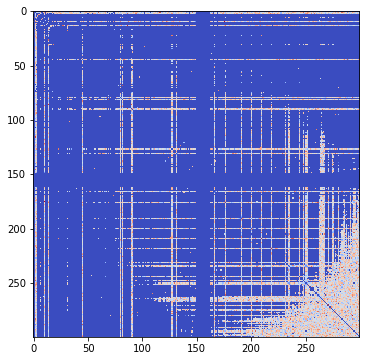

In [73]:
import swnMetrics as swn

A = ArandA[1][0.2,8,36000][1]

AReord = swn.reorderA2Visualize(A)
plt.imshow(AReord, cmap='coolwarm')

## Load A , calculate Q, save Q for the hist figure

In [23]:
#parameters tested
rewirings = 4000
pRand = [0,0.2]

weightDist = ['normal','lognormal']
###### Load Adjacency matrices
directoryALoad ='data/ArandA/1000iterationsHist/'
directoryQSave ='data/ModularityValues/1000iterationsHist/'

filePathALoad, filePathQSave = {}, {}
for p in pRand:
    for wD in weightDist:
        filePathALoad[(wD,p)] = directoryALoad + 'ArandA_tauTransProx_'+wD+'_p'+str(p)+'_rewir'+ str(rewirings)+'.pckl'
        filePathQSave[(wD,p)] = directoryQSave + 'Q_'+wD+'_p'+str(p)+'.pckl'
        
taus = {}
taus['normal',0] = [4, 4.1, 4.2, 4.3, 4.4]
taus['normal',0.2] = [3.95, 4.05, 4.15, 4.25, 4.35]
taus['lognormal',0] = [5.6, 5.7, 5.8, 5.9, 6]
taus['lognormal',0.2] = [5.3, 5.4, 5.5, 5.6, 5.7]


In [27]:
Q = {}
for p in pRand:
    for wD in weightDist:
        ArandA = hf.loadVar(filePathALoad[wD,p])
        Q[wD,p] = getModuAll(ArandA,taus[wD,p],[p])
        hf.saveVarSimple((Q[wD,p],taus[wD,p]), filePathQSave[wD,p])
        
        

In [25]:
ArandA[1].keys()

dict_keys([(0, 5.6, 4000), (0, 5.7, 4000), (0, 5.8, 4000), (0, 5.9, 4000), (0, 6, 4000)])

In [26]:
taus[wD,p]

[4, 4.1, 4.2, 4.3, 4.4]

## Load Q , plot Q

In [14]:
#parameters tested
rewirings = 4000
pRand = [0,0.2]

directoryQLoad ='data/ModularityValues/'
descr = 'QTransition_'

QLoadPath = {}
QLoadPath['normal'] = directoryQLoad + descr+'normal'+'.pckl'
QLoadPath['lognormal'] = directoryQLoad + descr+'lognormal'+'.pckl'

tausAll ={}
dictQ = {}
(dictQ['normal'],tausAll['normal']) = hf.loadVar(QLoadPath['normal'])
(dictQ['lognormal'],tausAll['lognormal']) = hf.loadVar(QLoadPath['lognormal'])

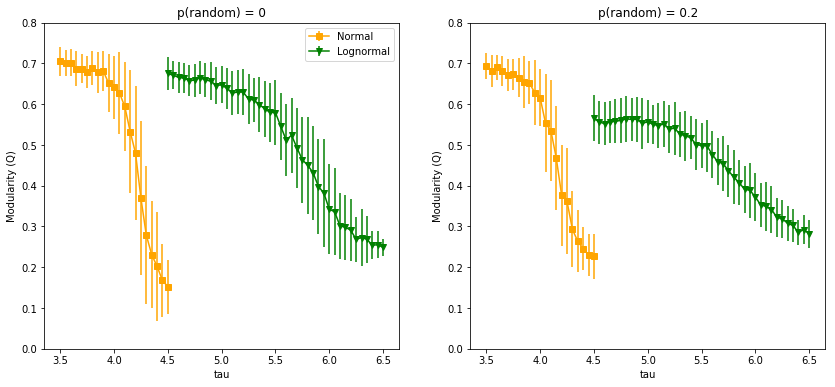

In [17]:
#plotQSlices(QNormal,QLognormal,taus,pRand)

plotQSlicesDiffTaus(dictQ['normal'],dictQ['lognormal'],tausAll,pRand)